# Exercise 7

# Capital Bikeshare data

## Introduction

- Capital Bikeshare dataset from Kaggle: [data](https://github.com/justmarkham/DAT8/blob/master/data/bikeshare.csv), [data dictionary](https://www.kaggle.com/c/bike-sharing-demand/data)
- Each observation represents the bikeshare rentals initiated during a given hour of a given day

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor, export_graphviz

In [ ]:
# read the data and set "datetime" as the index
url = 'https://raw.githubusercontent.com/justmarkham/DAT8/master/data/bikeshare.csv'
bikes = pd.read_csv(url, index_col='datetime', parse_dates=True)
bikes.head()

In [3]:
# "count" is a method, so it's best to rename that column
bikes.rename(columns={'count':'total'}, inplace=True)
bikes.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,total
datetime,,,,,,,,,,,
2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [4]:
# create "hour" as its own feature
bikes['hour'] = bikes.index.hour

In [5]:
bikes.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,total,hour
datetime,,,,,,,,,,,,
2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,0
2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,1
2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2
2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,3
2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,4


- **hour** ranges from 0 (midnight) through 23 (11pm)
- **workingday** is either 0 (weekend or holiday) or 1 (non-holiday weekday)

# Exercise 7.1

Run these two `groupby` statements and figure out what they tell you about the data.

In [6]:
# mean rentals for each value of "workingday"
bikes.groupby('workingday').total.mean()

workingday
0    188.506621
1    193.011873
Name: total, dtype: float64

El comando anterior muestra el promedio de bicicletas arrendadas cuando es día hábil (1) y cuando es día no hábil (0)

In [7]:
# mean rentals for each value of "hour"
bikes.groupby('hour').total.mean()

hour
0      55.138462
1      33.859031
2      22.899554
3      11.757506
4       6.407240
5      19.767699
6      76.259341
7     213.116484
8     362.769231
9     221.780220
10    175.092308
11    210.674725
12    256.508772
13    257.787281
14    243.442982
15    254.298246
16    316.372807
17    468.765351
18    430.859649
19    315.278509
20    228.517544
21    173.370614
22    133.576754
23     89.508772
Name: total, dtype: float64

Al igual que el comando anterior, este nos muestra promedio de bicicletas arrendadas en cada hora del día

# Exercise 7.2

Run this plotting code, and make sure you understand the output. Then, separate this plot into two separate plots conditioned on "workingday". (In other words, one plot should display the hourly trend for "workingday=0", and the other should display the hourly trend for "workingday=1".)

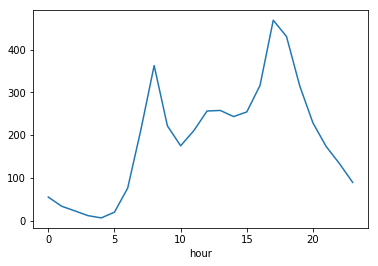

In [8]:
# mean rentals for each value of "hour"
bikes.groupby('hour').total.mean().plot()

Plot for workingday == 0 and workingday == 1

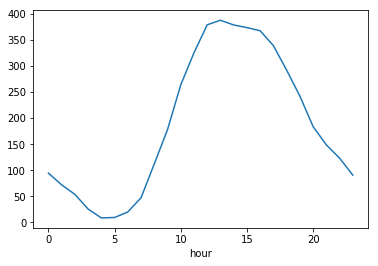

In [9]:
# hourly rental trend for "workingday=0"
bikes[bikes.workingday==0].groupby('hour').total.mean().plot()

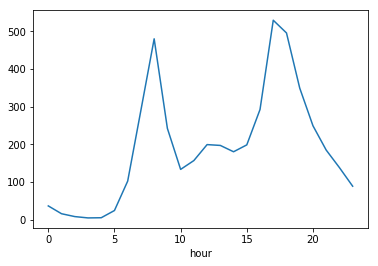

In [10]:
# hourly rental trend for "workingday=1"
bikes[bikes.workingday==1].groupby('hour').total.mean().plot()

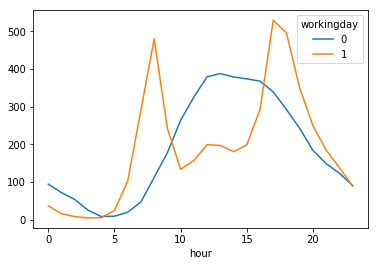

In [11]:
# combine the two plots
bikes.groupby(['hour', 'workingday']).total.mean().unstack().plot()

Write about your findings

Examinando las gráficas superpuestas se tiene que durante días hábiles se alcanzan niveles de ventas al inicio y final de la jornada laboral, mayores que en cualquier momento de un día no laboral. Pero, por otro lado, se tiene que durante días no hábiles se alquila una cantidad mayor en las horas del mediodía y en las horas de la madrugada

# Exercise 7.3

Fit a linear regression model to the entire dataset, using "total" as the response and "hour" and "workingday" as the only features. Then, print the coefficients and interpret them. What are the limitations of linear regression in this instance?

In [12]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [13]:
X_lin = bikes[['hour','workingday']]
Y_lin = bikes['total']

In [14]:
x_train, x_test, y_train, y_test = train_test_split(X_lin, Y_lin, random_state=1)

In [15]:
linreg = LinearRegression()

In [16]:
linreg.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [17]:
linreg.coef_

array([10.49362402,  5.20940956])

En este caso, una regresión lineal no se ajusta de forma adecuada al comportamiento de los datos, puesto no muestran un comportamiento lineal. Una forma de solucionar estos sería incluyendo parámetros no lineales, pero esto puede llevar a overfitting del modelo, haciendo que pierda generalidad

# Exercice 7.4

Create a Decision Tree to forecast "total" by manually iterating over the features "hour" and "workingday". The algorithm must at least have 6 end nodes.

In [18]:
bikes.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,total,hour
datetime,,,,,,,,,,,,
2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,0
2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,1
2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2
2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,3
2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,4


In [19]:
#Iniciamos calculando los RMSE haciendo en promedio dividiendo la base de datos en cada hora del día. 
#Con esto seleccionaremos la división que reduzca el RMSE
for hora in range(0,24):
    bikes['pred'] = bikes.loc[bikes.hour<hora, 'total'].mean()
    bikes.loc[bikes.hour>=hora, 'pred'] = bikes.loc[bikes.hour>=hora, 'total'].mean()
    print(hora, ((((bikes['total'] - bikes['pred'])**2).mean()) ** 0.5))

0 181.13613357426559
1 178.88076030483188
2 175.61266024769844
3 171.5350162975495
4 166.57596568309665
5 160.50832916137819
6 154.10979930228774
7 150.22560060405686
8 153.86972728404965
9 163.39221989024873
10 165.25615391972227
11 165.00286510437286
12 165.84659205524616
13 168.04756019190663
14 169.94604099621912
15 171.14521362143498
16 172.47403631919644
17 175.2235068708682
18 179.8668827954335
19 181.12705316323988
20 180.44126246625746
21 179.7297936918192
22 179.51222338944388
23 179.87454650980683


In [20]:
bikes_izq = bikes.loc[bikes.hour<7].copy()
bikes_der= bikes.loc[bikes.hour>=7].copy()
print('Hora menor a 7 ', bikes_izq.shape, 'Hora mayor ', bikes_der.shape)

Hora menor a 7  (3139, 13) Hora mayor  (7747, 13)


In [21]:
bikes_izq.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,total,hour,pred
datetime,,,,,,,,,,,,,
2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,0,196.036433
2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,1,196.036433
2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2,196.036433
2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,3,196.036433
2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,4,196.036433


In [22]:
def error_hour(bikes, hour):
    bikes['pred'] = bikes.loc[bikes.hour <hour, 'total'].mean()
    bikes.loc[bikes.hour>=hour, 'pred'] = bikes.loc[bikes.hour>=hour, 'total'].mean()
    print ((((bikes['total'] - bikes['pred'])**2).mean()) ** 0.5)

In [23]:
def error_workingday(bikes, workingday):
    bikes['pred'] = bikes.loc[bikes.workingday == workingday, 'total'].mean()
    bikes.loc[bikes.workingday==workingday, 'pred'] = bikes.loc[bikes.workingday==workingday, 'total'].mean()
    print ((((bikes['total'] - bikes['pred'])**2).mean()) ** 0.5)

In [24]:
for hour in bikes_der.hour.unique():
    print('Hour ',hour)
    error_hour(bikes_der, hour)
print('----------------------------------')
for workingday in [1,0]:
    print('Working day ',workingday)
    error_workingday(bikes_der, workingday)

Hour  7
176.28835016242152
Hour  8
175.9626543129351
Hour  9
175.9026463917815
Hour  10
176.22897287604295
Hour  11
176.1454556323947
Hour  12
175.84813796801208
Hour  13
175.89260116453647
Hour  14
175.92916682007098
Hour  15
175.83965773793437
Hour  16
175.82530141788737
Hour  17
176.19523832330185
Hour  18
175.115249088561
Hour  19
170.74027110094912
Hour  20
167.37168785994314
Hour  21
166.69864069956597
Hour  22
168.20616961120874
Hour  23
171.30096203191567
----------------------------------
Working day  1
176.31813710046876
Working day  0
176.42507805273823


In [25]:
for hour in bikes_izq.hour.unique():
    print('Hour ',hour)
    error_hour(bikes_izq, hour)
    
print('----------------------------------')

for workingday in [1,0]:
    print('Working day ',workingday)
    error_workingday(bikes_izq, workingday)

Hour  0
39.56714516247788
Hour  1
38.46175887834954
Hour  2
38.827302356307555
Hour  3
39.34538405588436
Hour  4
39.534113157382144
Hour  5
38.30948200125475
Hour  6
35.24426946227024
----------------------------------
Working day  1
39.748785093241914
Working day  0
40.37029831716628


## Rama izquierda izquierda

In [27]:
bikes_izq_izq = bikes_izq.loc[bikes_izq.workingday==0].copy()

for hour in bikes_izq_izq.hour.unique():
    print('Hour ',hour)
    error_hour(bikes_izq_izq, hour)
print('----------------------------------')
for workingday in [1,0]:
    print('Working day ',workingday)
    error_workingday(bikes_izq_izq, workingday)

Hour  0
40.272107313288316
Hour  1
33.68039155736384
Hour  2
29.827790565652187
Hour  3
28.446521690040527
Hour  4
32.21159565572825
Hour  5
36.82521970670577
Hour  6
39.377837958084605
----------------------------------
Working day  1
nan
Working day  0
40.272107313288316


# Primera rama

In [39]:
bikes_izq_izq_izq=bikes_izq_izq.loc[bikes_izq_izq.hour<3].copy()
for hour in bikes_izq_izq_izq.hour.unique():
    print('Hour ',hour)
    error_hour(bikes_izq_izq_izq, hour)
print('----------------------------------')
for workingday in [1,0]:
    print('Working day ',workingday)
    error_workingday(bikes_izq_izq_izq, workingday)

Hour  0
40.253410469679785
Hour  1
37.38934088998544
Hour  2
37.795222429330074
----------------------------------
Working day  1
nan
Working day  0
40.253410469679785


In [40]:
bikes_izq_izq_izq.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,total,hour,pred
datetime,,,,,,,,,,,,,
2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16,0,73.473441
2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40,1,73.473441
2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32,2,73.473441
2011-01-02 00:00:00,1,0,0,2,18.86,22.725,88,19.9995,4,13,17,0,73.473441
2011-01-02 01:00:00,1,0,0,2,18.04,21.970,94,16.9979,1,16,17,1,73.473441


## Segunda Rama

In [41]:
bikes_izq_izq_der=bikes_izq_izq.loc[bikes_izq_izq.hour>=3].copy()
for hour in bikes_izq_izq_der.hour.unique():
    print('Hour ',hour)
    error_hour(bikes_izq_izq_der, hour)
print('----------------------------------')
for workingday in [1,0]:
    print('Working day ',workingday)
    error_workingday(bikes_izq_izq_der, workingday)

Hour  3
14.12257188173542
Hour  4
12.975591773298191
Hour  5
14.076821075389649
Hour  6
13.919456344790483
----------------------------------
Working day  1
nan
Working day  0
14.12257188173542


In [43]:
bikes_izq_izq_der.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,total,hour,pred
datetime,,,,,,,,,,,,,
2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13,3,15.878472
2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1,4,15.878472
2011-01-01 05:00:00,1,0,0,2,9.84,12.880,75,6.0032,0,1,1,5,15.878472
2011-01-01 06:00:00,1,0,0,1,9.02,13.635,80,0.0000,2,0,2,6,15.878472
2011-01-02 03:00:00,1,0,0,2,18.86,22.725,94,12.9980,2,4,6,3,15.878472


#### Rama izquierda derecha

In [29]:
bikes_izq_der = bikes_izq.loc[bikes_izq.workingday==1].copy()

for hour in bikes_izq_der.hour.unique():
    print('Hour ',hour)
    error_hour(bikes_izq_der, hour)
print('----------------------------------')
for workingday in [1,0]:
    print('Working day ',workingday)
    error_workingday(bikes_izq_der, workingday)

Hour  0
38.65329098321401
Hour  1
38.513930163234264
Hour  4
36.08976094916708
Hour  5
31.587590064508074
Hour  6
23.803612375263405
Hour  2
38.62270734237614
Hour  3
37.959963780131886
----------------------------------
Working day  1
38.65329098321401
Working day  0
nan


## Tercera rama

In [51]:
bikes_izq_der_izq = bikes_izq_der.loc[bikes_izq.hour < 6].copy()

for hour in bikes_izq_der_izq.hour.unique():
    print('Hour ',hour)
    error_hour(bikes_izq_der_izq, hour)
print('----------------------------------')
for workingday in [1,0]:
    print('Working day ',workingday)
    error_workingday(bikes_izq_der_izq, workingday)

Hour  0
17.662399333025277
Hour  1
15.018664647349448
Hour  4
17.64629381169002
Hour  5
17.25625459660118
Hour  2
16.083690533118514
Hour  3
17.128928197613828
----------------------------------
Working day  1
17.662399333025277
Working day  0
nan


In [52]:
bikes_izq_der_izq.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,total,hour,pred
datetime,,,,,,,,,,,,,
2011-01-03 00:00:00,1,0,1,1,9.02,9.850,44,23.9994,0,5,5,0,NaN
2011-01-03 01:00:00,1,0,1,1,8.20,8.335,44,27.9993,0,2,2,1,NaN
2011-01-03 04:00:00,1,0,1,1,6.56,6.820,47,26.0027,0,1,1,4,NaN
2011-01-03 05:00:00,1,0,1,1,6.56,6.820,47,19.0012,0,3,3,5,NaN
2011-01-04 00:00:00,1,0,1,1,6.56,9.090,55,7.0015,0,5,5,0,NaN


## Cuarta Rama

In [53]:
bikes_izq_der_der = bikes_izq_der.loc[bikes_izq.hour >=6].copy()
bikes_izq_der_der.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,total,hour,pred
datetime,,,,,,,,,,,,,
2011-01-03 06:00:00,1,0,1,1,5.74,5.305,50,26.0027,0,30,30,6,NaN
2011-01-04 06:00:00,1,0,1,1,4.92,7.575,74,7.0015,0,36,36,6,NaN
2011-01-05 06:00:00,1,0,1,1,8.20,9.850,47,15.0013,0,33,33,6,NaN
2011-01-06 06:00:00,1,0,1,2,5.74,8.335,63,7.0015,0,36,36,6,NaN
2011-01-07 06:00:00,1,0,1,2,8.20,12.880,69,0.0000,8,26,34,6,NaN


## Analizamos la rama derecha

In [33]:
bikes_der_izq = bikes_der.loc[bikes_der.workingday==0].copy()

for hour in bikes_der_izq.hour.unique():
    print('Hour ',hour)
    error_hour(bikes_der_izq, hour)
print('----------------------------------')
for workingday in [1,0]:
    print('Working day ',workingday)
    error_workingday(bikes_der_izq, workingday)

Hour  7
170.98693407823518
Hour  8
163.3761584102217
Hour  9
159.4219008459288
Hour  10
158.87064862847848
Hour  11
161.97776562872141
Hour  12
165.96563887874137
Hour  13
169.4043572482482
Hour  14
170.88334974518756
Hour  15
170.72751441141574
Hour  16
169.2792053571243
Hour  17
166.56778030071393
Hour  18
163.2467204303338
Hour  19
160.51388415769782
Hour  20
159.20881201904007
Hour  21
160.36612612482764
Hour  22
162.9271714870944
Hour  23
166.3354680488634
----------------------------------
Working day  1
nan
Working day  0
170.98693407823518


In [54]:
bikes_der_der = bikes_der.loc[bikes_der.workingday<=10].copy()

for hour in bikes_der_der.hour.unique():
    print('Hour ',hour)
    error_hour(bikes_der_der, hour)
print('----------------------------------')
for workingday in [1,0]:
    print('Working day ',workingday)
    error_workingday(bikes_der_der, workingday)

Hour  7
176.28835016242152
Hour  8
175.9626543129351
Hour  9
175.9026463917815
Hour  10
176.22897287604295
Hour  11
176.1454556323947
Hour  12
175.84813796801208
Hour  13
175.89260116453647
Hour  14
175.92916682007098
Hour  15
175.83965773793437
Hour  16
175.82530141788737
Hour  17
176.19523832330185
Hour  18
175.115249088561
Hour  19
170.74027110094912
Hour  20
167.37168785994314
Hour  21
166.69864069956597
Hour  22
168.20616961120874
Hour  23
171.30096203191567
----------------------------------
Working day  1
176.31813710046876
Working day  0
176.42507805273823


## Quinta rama

In [35]:
bikes_der_izq_izq = bikes_der_izq.loc[bikes_der_izq.hour < 21].copy()
for hour in bikes_der_izq_izq.hour.unique():
    print('Hour ',hour)
    error_hour(bikes_der_izq_izq, hour)
print('----------------------------------')
for workingday in [1,0]:
    print('Working day ',workingday)
    error_workingday(bikes_der_izq_izq, workingday)

Hour  7
43.48892132762309
----------------------------------
Working day  1
nan
Working day  0
43.48892132762309


In [44]:
bikes_der_izq_izq.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,total,hour,pred
datetime,,,,,,,,,,,,,
2011-01-01 07:00:00,1,0,0,1,8.20,12.880,86,0.0000,1,2,3,7,47.268966
2011-01-02 07:00:00,1,0,0,2,16.40,20.455,76,12.9980,0,1,1,7,47.268966
2011-01-08 07:00:00,1,0,0,2,6.56,9.090,74,7.0015,1,8,9,7,47.268966
2011-01-09 07:00:00,1,0,0,1,3.28,4.545,53,12.9980,1,5,6,7,47.268966
2011-01-15 07:00:00,1,0,0,1,5.74,10.605,63,0.0000,1,9,10,7,47.268966


## Sexta rama

In [55]:
bikes_der_der_izq = bikes_der_der.loc[bikes_der_der.hour >10].copy()
for hour in bikes_der_der_izq.hour.unique():
    print('Hour ',hour)
    error_hour(bikes_der_der_izq, hour)
print('----------------------------------')
for workingday in [1,0]:
    print('Working day ',workingday)
    error_workingday(bikes_der_der_izq, workingday)

Hour  11
177.4773406849586
Hour  12
176.9081369021088
Hour  13
177.12275994669793
Hour  14
177.19586079253662
Hour  15
177.08004625441927
Hour  16
177.0610066809156
Hour  17
177.44947358725747
Hour  18
175.07799421433438
Hour  19
168.1317625277097
Hour  20
163.459483846209
Hour  21
163.09226937186298
Hour  22
165.81338311600015
Hour  23
170.52133245677595
----------------------------------
Working day  1
177.710265152865
Working day  0
178.54581620717332


In [56]:
bikes_der_der_izq.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,total,hour,pred
datetime,,,,,,,,,,,,,
2011-01-01 11:00:00,1,0,0,1,14.76,16.665,81,19.0012,26,30,56,11,279.432361
2011-01-01 12:00:00,1,0,0,1,17.22,21.210,77,19.0012,29,55,84,12,279.432361
2011-01-01 13:00:00,1,0,0,2,18.86,22.725,72,19.9995,47,47,94,13,279.432361
2011-01-01 14:00:00,1,0,0,2,18.86,22.725,72,19.0012,35,71,106,14,279.432361
2011-01-01 15:00:00,1,0,0,2,18.04,21.970,77,19.9995,40,70,110,15,279.432361


## Septima rama

In [57]:
bikes_der_izq_der = bikes_der_izq.loc[bikes_der_izq.hour >= 21].copy()
for hour in bikes_der_der_izq.hour.unique():
    print('Hour ',hour)
    error_hour(bikes_der_der_izq, hour)
print('----------------------------------')
for workingday in [1,0]:
    print('Working day ',workingday)
    error_workingday(bikes_der_der_izq, workingday)

Hour  11
177.4773406849586
Hour  12
176.9081369021088
Hour  13
177.12275994669793
Hour  14
177.19586079253662
Hour  15
177.08004625441927
Hour  16
177.0610066809156
Hour  17
177.44947358725747
Hour  18
175.07799421433438
Hour  19
168.1317625277097
Hour  20
163.459483846209
Hour  21
163.09226937186298
Hour  22
165.81338311600015
Hour  23
170.52133245677595
----------------------------------
Working day  1
177.710265152865
Working day  0
178.54581620717332


In [58]:
bikes_der_izq_der.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,total,hour,pred
datetime,,,,,,,,,,,,,
2011-01-01 21:00:00,1,0,0,2,16.40,20.455,87,12.9980,3,31,34,21,249.051521
2011-01-01 22:00:00,1,0,0,2,16.40,20.455,94,15.0013,11,17,28,22,249.051521
2011-01-01 23:00:00,1,0,0,2,18.86,22.725,88,19.9995,15,24,39,23,249.051521
2011-01-02 21:00:00,1,0,0,1,10.66,11.365,44,22.0028,11,20,31,21,249.051521
2011-01-02 22:00:00,1,0,0,1,9.84,10.605,44,19.9995,0,9,9,22,249.051521


## Octava rama

In [59]:
bikes_der_der_der = bikes_der_der.loc[bikes_der_der.hour >= 12].copy()
bikes_der_der_der.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,total,hour,pred
datetime,,,,,,,,,,,,,
2011-01-01 12:00:00,1,0,0,1,17.22,21.210,77,19.0012,29,55,84,12,249.051521
2011-01-01 13:00:00,1,0,0,2,18.86,22.725,72,19.9995,47,47,94,13,249.051521
2011-01-01 14:00:00,1,0,0,2,18.86,22.725,72,19.0012,35,71,106,14,249.051521
2011-01-01 15:00:00,1,0,0,2,18.04,21.970,77,19.9995,40,70,110,15,249.051521
2011-01-01 16:00:00,1,0,0,2,17.22,21.210,82,19.9995,41,52,93,16,249.051521


# Exercise 7.5

Train a Decision Tree using scikit-learn. Comment about the performance of the models.

In [64]:
from sklearn.tree import DecisionTreeRegressor
feature_cols = ['hour', 'workingday']
X = bikes[feature_cols]
y = bikes.total

treereg = DecisionTreeRegressor(random_state=1)
treereg.fit(X, y)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=1, splitter='best')

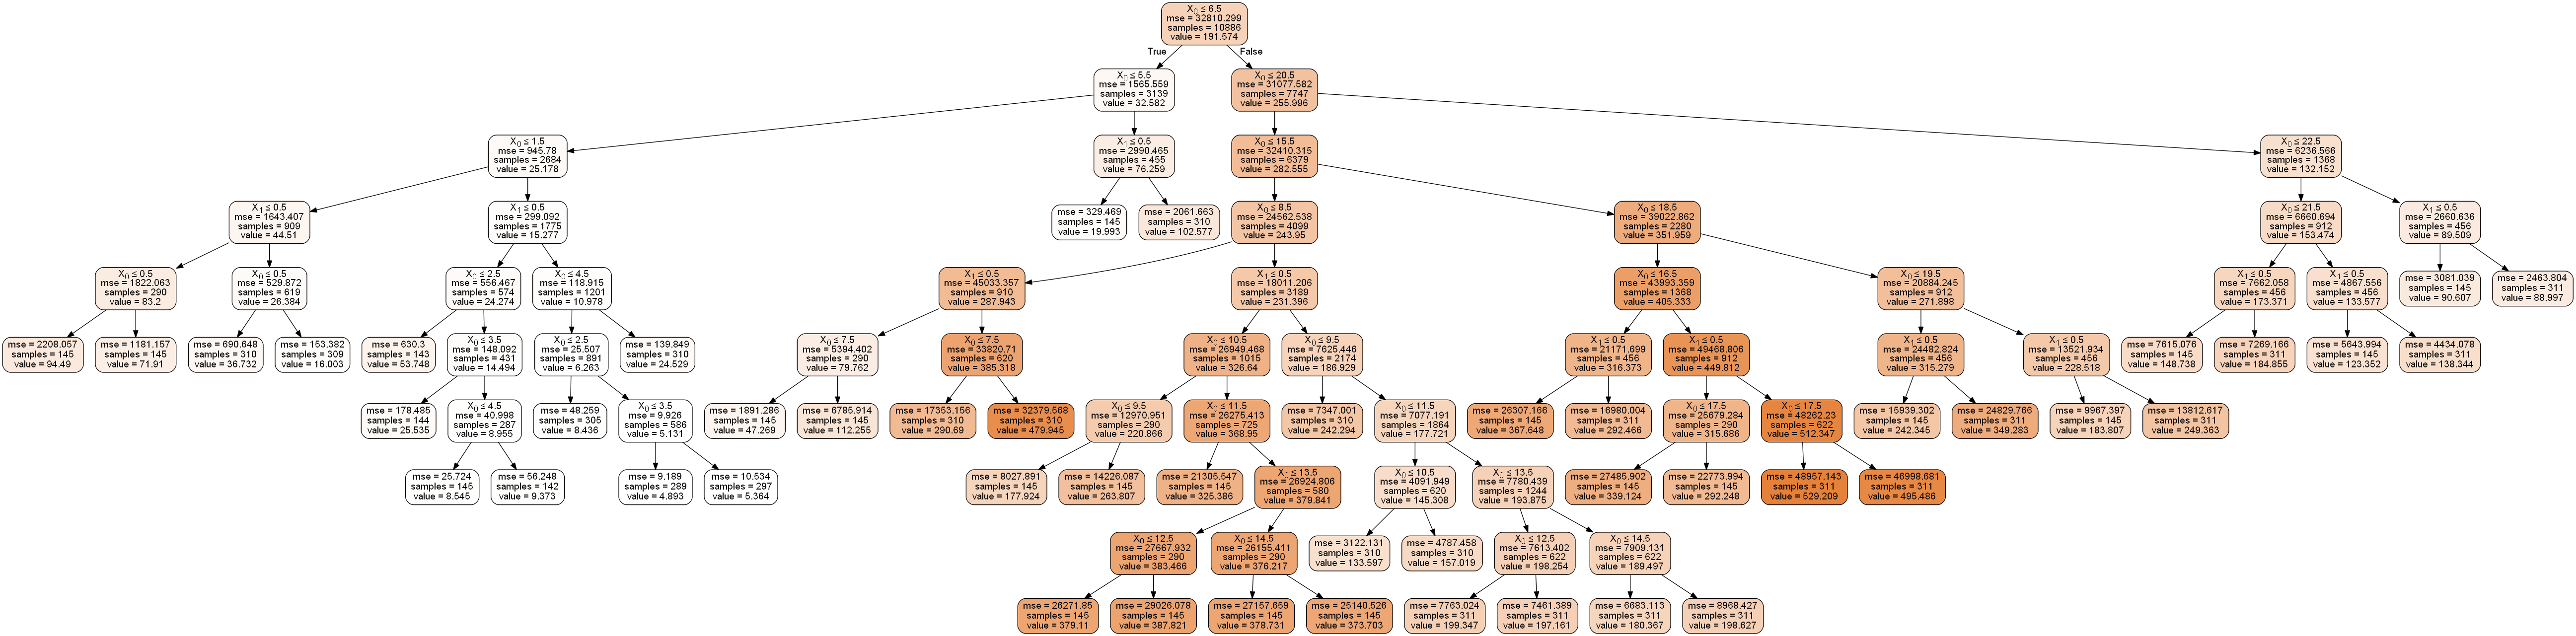

In [65]:
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
dot_data = StringIO()
export_graphviz(treereg, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())